In [ ]:
# Correction:

In [145]:
import os
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import extract_patches_2d

['forest3.jpg', 'forest2.jpg', 'forest1.jpg', 'forest5.jpg', 'forest4.jpg', 'forest6.jpg', 'forest7.jpg', 'desert7.jpg', 'sky2.jpg', 'sky3.jpg', 'desert6.jpg', 'desert4.jpg', 'sky1.jpg', 'desert5.jpg', 'desert1.jpg', 'sky4.jpg', 'sky5.jpg', 'desert2.jpg', 'sky7.jpg', 'sky6.jpg', 'desert3.jpg']
(177, 284, 3)


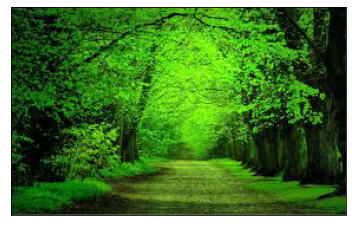

(168, 300, 3)


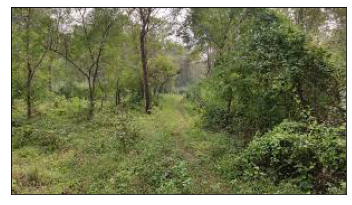

(184, 275, 3)


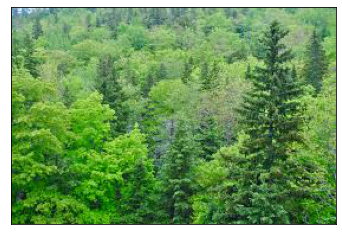

(174, 290, 3)


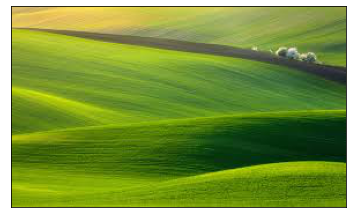

(182, 277, 3)


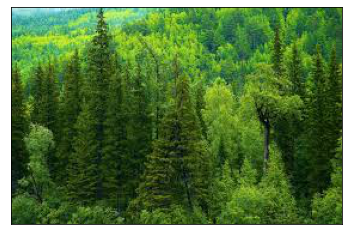

(212, 238, 3)


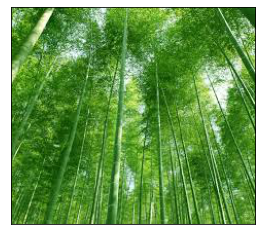

(168, 300, 3)


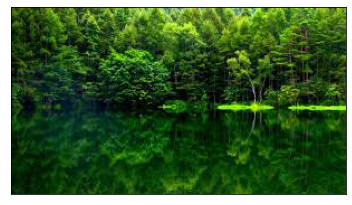

(194, 259, 3)


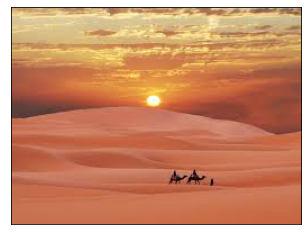

(183, 276, 3)


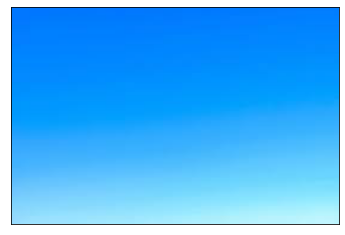

(183, 275, 3)


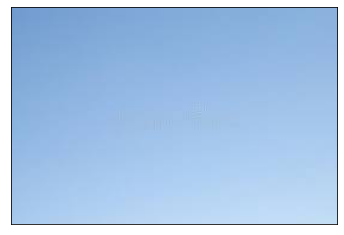

(173, 291, 3)


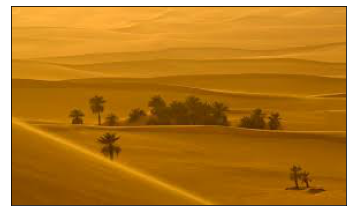

(143, 353, 3)


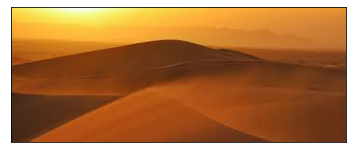

(183, 275, 3)


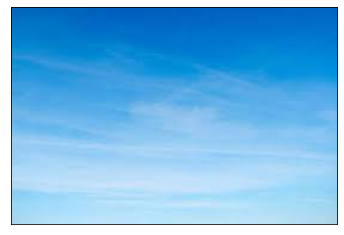

(225, 225, 3)


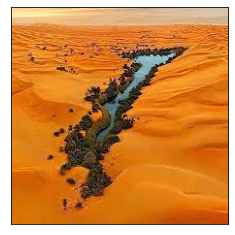

(183, 275, 3)


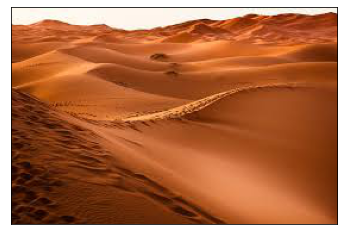

(183, 275, 3)


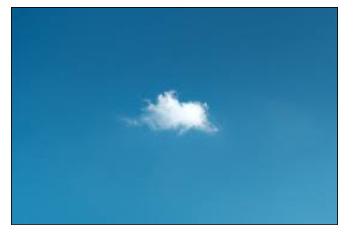

(180, 280, 3)


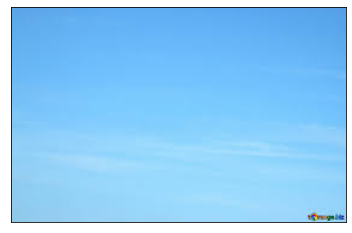

(275, 183, 3)


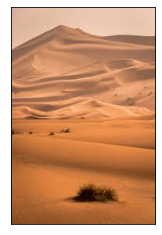

(179, 281, 3)


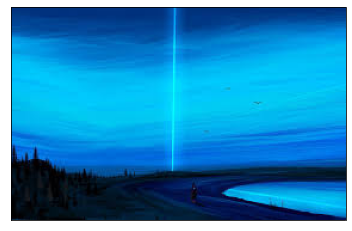

(194, 259, 3)


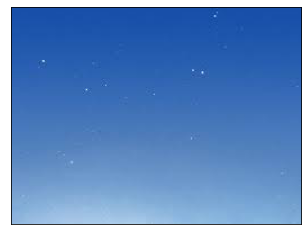

(194, 259, 3)


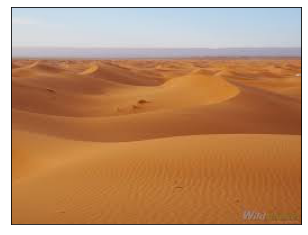

In [146]:
root = os.getcwd()
train_folder = os.path.join(root, "Train_images")
train_files = os.listdir(train_folder)
print(train_files)
for i in range(len(train_files)):
    file = os.path.join(train_folder, train_files[i])
    image = mpimg.imread(file)
    print(image.shape)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [147]:
data_arr = []
for i in range(len(train_files)):
    file = os.path.join(train_folder, train_files[i])
    image = mpimg.imread(file)
    image_patches = extract_patches_2d(image, (7,7),max_patches=100)
    for j in range(len(image_patches)):
        patch = np.ravel(image_patches[j])
        data_arr.append(patch)
data_arr = np.matrix(data_arr)
print(data_arr.shape)
print(data_arr[:2])

(2100, 147)
[[ 41  91  54  26  70  55   5  51  23  48 100  34   0  59   0  48 111   0
   25  83   0  39 101  36   1  55  21   0  40   4  67 126  58 107 174  71
   96 163  47  13  75   0  36 114   5  45 113  40   4  67  10  92 157  91
   79 148  59  36 107   3   0  42   0  62 150   2  37 116   1   3  74   0
   20  89  26  39 109  36   0  41   0  14  84   0 111 204  35  58 142   4
   30 105  14   5  75  12   0  52   0  94 168  71 127 200  85 104 196  23
  110 193  49  87 161  64   1  70   3  24  95  19 108 181  74 114 189  62
  131 220  44 107 186  43  37 106  13   0  34   0   0  55   0  80 152  40
   56 125   6]
 [133 239  45 134 242  45 100 208   9 101 213   7 125 240  25 129 245  22
  132 250  18 139 241  54 123 226  33 125 227  30 140 243  40 135 239  32
  139 241  33 132 234  28 103 201  40  99 198  30  95 193  18 108 208  24
  115 216  24 123 225  27 129 230  30  81 177  25  83 180  21  84 183  15
   96 194  21  92 191  10  74 175   0  83 185   0  69 170   0  86 188   3
   96 198  

In [148]:
K = 3
label_arr = np.zeros(data_arr.shape[0], dtype=np.int32)
for i in range(label_arr.shape[0]):
    label_arr[i] = np.random.choice(K)
print(label_arr)
print(np.unique(label_arr, return_counts=True))

[2 2 1 ... 1 2 2]
(array([0, 1, 2], dtype=int32), array([671, 740, 689]))


In [149]:
def similarity(vec1, vec2):
    vec1 = np.ravel(vec1)
    vec1 = vec1/np.linalg.norm(vec1)
    
    vec2 = np.ravel(vec2)
    vec2 = vec2/np.linalg.norm(vec2)
    
    angle = np.dot(vec1, vec2)
    return angle

In [150]:
def init_centroids(K, data_arr, label_arr):
    mean_cent = []
    size_cent = []
    cluster_cent = [[] for i in range(K)]
    
    for i in range(len(data_arr)):
        for k in range(K):
            if label_arr[i]==k:
                data_pt = np.ravel(data_arr[i,:])/np.linalg.norm(np.ravel(data_arr[i,:]))
                cluster_cent[k].append(data_pt)
    for k in range(K):
        cluster_mat = np.matrix(cluster_cent[k])
        pointNum = cluster_mat.shape[0]
        mean_k = np.mean(cluster_mat, axis=0)
        mean_k = np.ravel(mean_k)/np.linalg.norm(np.ravel(mean_k))
        mean_cent.append(mean_k)
        size_cent.append(pointNum)
    return mean_cent, size_cent

In [151]:
def label_update(prev_mean, data_arr, label_arr):
    for i in range(len(data_arr)):
        sim_pt = []
        for k in range(K):
            sim = similarity(data_arr[i], prev_mean[k])
            sim_pt.append(sim)
        sim_arr = np.array(sim_pt)
        new_label = np.argmax(sim_arr)
        label_arr[i] = new_label
    return label_arr

In [152]:
def update_centroids(K, prev_mean, prev_size, data_arr, label_arr):
    cluster_pts = [[] for k in range(K)]
    
    for i in range(data_arr.shape[0]):
        for k in range(K):
            if label_arr[i]==k:
                data_pt = np.ravel(data_arr[i,:])/np.linalg.norm(np.ravel(data_arr[i,:]))
                cluster_pts[k].append(data_pt)
    for k in range(K):
        print(len(cluster_pts[k]))
        if len(cluster_pts[k])!=0:
            cluster_mat = np.matrix(cluster_pts[k])
            pointNum = cluster_mat.shape[0]
            mean_k = np.mean(cluster_mat, axis=0)
            mean_k = np.ravel(mean_k)/np.linalg.norm(np.ravel(mean_k))
            prev_mean[k] = mean_k
            prev_size[k] = pointNum
        new_mean = prev_mean
        new_size = prev_size
    return new_mean, new_size

In [153]:
def SphericalKMeans(data_arr, label_arr, maxIter):
    prev_mean, prev_size = init_mean_cov(K, data_arr, label_arr)
    print(prev_size)
    for iter in range(maxIter):
        new_label = label_update(prev_mean, data_arr, label_arr)
        new_mean, new_size = mean_from_label(K, prev_mean, prev_size, data_arr, label_arr)
        label_arr = new_label
        prev_mean = new_mean
        prev_size = new_size
        print(f"Iteration: {iter} is completed!")
    return new_mean, new_size

In [154]:
mean_cent, size_cent = SphericalKMeans(data_arr, label_arr, 30)

[671, 740, 689]
794
243
1063
Iteration: 0 is completed!
741
528
831
Iteration: 1 is completed!
740
606
754
Iteration: 2 is completed!
745
650
705
Iteration: 3 is completed!
741
680
679
Iteration: 4 is completed!
739
686
675
Iteration: 5 is completed!
739
689
672
Iteration: 6 is completed!
739
691
670
Iteration: 7 is completed!
738
693
669
Iteration: 8 is completed!
738
694
668
Iteration: 9 is completed!
738
694
668
Iteration: 10 is completed!
738
694
668
Iteration: 11 is completed!
738
694
668
Iteration: 12 is completed!
738
694
668
Iteration: 13 is completed!
738
694
668
Iteration: 14 is completed!
738
694
668
Iteration: 15 is completed!
738
694
668
Iteration: 16 is completed!
738
694
668
Iteration: 17 is completed!
738
694
668
Iteration: 18 is completed!
738
694
668
Iteration: 19 is completed!
738
694
668
Iteration: 20 is completed!
738
694
668
Iteration: 21 is completed!
738
694
668
Iteration: 22 is completed!
738
694
668
Iteration: 23 is completed!
738
694
668
Iteration: 24 is comp

In [155]:
mean_cent = np.array(mean_cent)
print(mean_cent.shape)
print(size_cent/np.sum(size_cent))

(3, 147)
[0.35142857 0.33047619 0.31809524]


In [215]:
def testImage(img_file, mean_cent):
    image = mpimg.imread(img_file)
    plt.imshow(image)
    plt.show()
    img_patches = extract_patches_2d(image, (7,7),max_patches=100)
    test_arr = []
    
    #for i in range(len(image_patches)):
        #patch_vec = np.ravel(image_patches[i])
    for i in range(len(img_patches)):
        patch_vec = np.ravel(img_patches[i])
        test_arr.append(patch_vec)
    test_arr = np.matrix(test_arr)
    print(test_arr.shape)
    for j in range(len(test_arr)):
        feat_vec = []
        for k in range(len(mean_cent)):
            test_sample = np.ravel(test_arr[j,:])/np.linalg.norm(np.ravel(test_arr[j,:]))
            sim = np.dot(test_sample, mean_cent[k])
            feat_vec.append(sim)
        print(feat_vec/sum(feat_vec))

test_img4.jpg


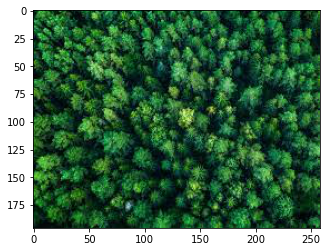

(100, 147)
[0.35147521 0.37502735 0.27349744]
[0.32904736 0.36454884 0.3064038 ]
[0.35607647 0.37206624 0.27185728]
[0.38365172 0.35843563 0.25791265]
[0.33117457 0.37958901 0.28923642]
[0.33024586 0.3618625  0.30789163]
[0.35193038 0.37151354 0.27655608]
[0.37100875 0.35875252 0.27023873]
[0.33817931 0.36957313 0.29224756]
[0.33867293 0.38372955 0.27759752]
[0.33372386 0.36580651 0.30046963]
[0.34115699 0.36993485 0.28890815]
[0.31931659 0.37552388 0.30515953]
[0.37080012 0.35631605 0.27288383]
[0.35991894 0.36786514 0.27221592]
[0.34566769 0.36867059 0.28566173]
[0.34785859 0.38295165 0.26918976]
[0.31439641 0.37444199 0.31116159]
[0.33194956 0.37950072 0.28854973]
[0.39632701 0.34880018 0.25487281]
[0.35499199 0.36254592 0.28246209]
[0.35654026 0.37027303 0.27318671]
[0.36191427 0.3608546  0.27723114]
[0.35712812 0.36178381 0.28108807]
[0.35773277 0.37134842 0.27091881]
[0.33862942 0.3632248  0.29814578]
[0.36027261 0.37333422 0.26639318]
[0.35687305 0.36814787 0.27497908]
[0.330319

In [223]:
test_folder = os.path.join(root, "Test_images")
img_files = os.listdir(test_folder)
file = np.random.choice(img_files)
print(file)
file_path = os.path.join(test_folder, file)
testImage(file_path, mean_cent)

In [43]:
#0:
#1: Forest
#2: